In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.utils.data as tud
import matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  #gpu
# device = torch.device("cpu")

# Mnist数据集

In [2]:
mnist_data = datasets.MNIST("./mnist_data", train=True, download=False,
                            transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize(mean=(0.5,),std=(0.5,))  #就会把tensor变成(-1,1)而不是用真实的均值和方差normalize
                            ]))
batch_size = 32
data_loader = tud.DataLoader(mnist_data, batch_size=batch_size,shuffle=True)

# （1）配置网络

In [3]:
image_size = 28*28
hidden_size = 256

D = nn.Sequential(
    nn.Linear(image_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, 1),#1：二分类问题，对和不对
    nn.LeakyReLU(0.2),
    nn.Sigmoid()
)

latent_size= 64
G = nn.Sequential(
    nn.Linear(latent_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, image_size),
    nn.Tanh()
)
D = D.to(device)
G = G.to(device)

# (2)定义损失函数

In [4]:
loss_fn = nn.BCELoss()

# (3)定义优化策略

In [5]:
d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0003)
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0003)

# 训练网络

In [6]:
total_steps = len(data_loader)
num_epochs = 30
for epoch in range(num_epochs):
    print(epoch)
    for i, (images, _) in enumerate(data_loader):
        batch_size = images.shape[0]
        images = images.reshape(batch_size, image_size).to(device)
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)
        outputs = D(images)
        d_loss_real = loss_fn(outputs, real_labels)
        real_score = outputs

        z = torch.randn(batch_size, latent_size).to(device)
        fake_images = G(z)
        outputs = D(fake_images.detach())
        d_loss_fake = loss_fn(outputs, fake_labels)
        fake_score = outputs

        d_loss = d_loss_real + d_loss_fake
        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()

        outputs = D(fake_images)
        g_loss = loss_fn(outputs, real_labels)
        g_score = outputs
        d_optimizer.zero_grad()
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()
        if i % 100 ==0:  #generator的score比较高的话效果就会比较好 一直上升   #拓展：提高效果
            print("Epoch [{}/{}], Step [ {}/{} ], d_loss: {:.4f}, g_loss: {:.4f},g_score: {:.4f} "#加g_score
              .format(epoch, num_epochs, i, len(data_loader), d_loss.item(), g_loss.item(), g_score.sum()))

0
Epoch [0/30], Step [ 0/1875 ], d_loss: 1.3360, g_loss: 0.6950,g_score: 15.9713 
Epoch [0/30], Step [ 100/1875 ], d_loss: 0.7363, g_loss: 0.7445,g_score: 15.2107 
Epoch [0/30], Step [ 200/1875 ], d_loss: 0.6506, g_loss: 0.8502,g_score: 13.6852 
Epoch [0/30], Step [ 300/1875 ], d_loss: 0.5562, g_loss: 0.9915,g_score: 11.9202 
Epoch [0/30], Step [ 400/1875 ], d_loss: 0.7065, g_loss: 0.8044,g_score: 14.3291 
Epoch [0/30], Step [ 500/1875 ], d_loss: 1.1639, g_loss: 0.7148,g_score: 15.8424 
Epoch [0/30], Step [ 600/1875 ], d_loss: 1.0757, g_loss: 0.6709,g_score: 16.4143 
Epoch [0/30], Step [ 700/1875 ], d_loss: 0.9815, g_loss: 0.8124,g_score: 14.4821 
Epoch [0/30], Step [ 800/1875 ], d_loss: 0.9020, g_loss: 0.8086,g_score: 14.6839 
Epoch [0/30], Step [ 900/1875 ], d_loss: 0.6832, g_loss: 0.8887,g_score: 13.1896 
Epoch [0/30], Step [ 1000/1875 ], d_loss: 1.0253, g_loss: 0.8050,g_score: 14.4458 
Epoch [0/30], Step [ 1100/1875 ], d_loss: 0.9713, g_loss: 0.7098,g_score: 16.0218 
Epoch [0/30], 

Epoch [5/30], Step [ 500/1875 ], d_loss: 1.0163, g_loss: 0.8768,g_score: 13.7842 
Epoch [5/30], Step [ 600/1875 ], d_loss: 1.3961, g_loss: 0.9641,g_score: 12.6129 
Epoch [5/30], Step [ 700/1875 ], d_loss: 0.9606, g_loss: 1.0036,g_score: 12.0146 
Epoch [5/30], Step [ 800/1875 ], d_loss: 0.8601, g_loss: 0.9104,g_score: 13.0219 
Epoch [5/30], Step [ 900/1875 ], d_loss: 1.4880, g_loss: 0.8554,g_score: 13.7687 
Epoch [5/30], Step [ 1000/1875 ], d_loss: 1.2699, g_loss: 1.0062,g_score: 11.8709 
Epoch [5/30], Step [ 1100/1875 ], d_loss: 0.9038, g_loss: 0.9448,g_score: 12.5583 
Epoch [5/30], Step [ 1200/1875 ], d_loss: 1.1293, g_loss: 0.9583,g_score: 12.6136 
Epoch [5/30], Step [ 1300/1875 ], d_loss: 1.5492, g_loss: 0.8368,g_score: 14.3240 
Epoch [5/30], Step [ 1400/1875 ], d_loss: 1.0449, g_loss: 1.0250,g_score: 11.9389 
Epoch [5/30], Step [ 1500/1875 ], d_loss: 1.3767, g_loss: 1.0281,g_score: 11.5975 
Epoch [5/30], Step [ 1600/1875 ], d_loss: 1.3667, g_loss: 0.8578,g_score: 14.0145 
Epoch [5/

Epoch [10/30], Step [ 1000/1875 ], d_loss: 1.1214, g_loss: 1.0540,g_score: 11.3686 
Epoch [10/30], Step [ 1100/1875 ], d_loss: 1.1401, g_loss: 0.9921,g_score: 12.0724 
Epoch [10/30], Step [ 1200/1875 ], d_loss: 1.0663, g_loss: 1.0138,g_score: 12.0260 
Epoch [10/30], Step [ 1300/1875 ], d_loss: 1.3640, g_loss: 1.1877,g_score: 10.1296 
Epoch [10/30], Step [ 1400/1875 ], d_loss: 0.9598, g_loss: 1.0069,g_score: 12.1430 
Epoch [10/30], Step [ 1500/1875 ], d_loss: 0.9868, g_loss: 0.9510,g_score: 12.6643 
Epoch [10/30], Step [ 1600/1875 ], d_loss: 1.0480, g_loss: 1.0410,g_score: 11.8867 
Epoch [10/30], Step [ 1700/1875 ], d_loss: 1.0778, g_loss: 0.8712,g_score: 13.7596 
Epoch [10/30], Step [ 1800/1875 ], d_loss: 0.9885, g_loss: 0.9247,g_score: 13.2509 
11
Epoch [11/30], Step [ 0/1875 ], d_loss: 1.0309, g_loss: 1.0858,g_score: 11.1006 
Epoch [11/30], Step [ 100/1875 ], d_loss: 1.0507, g_loss: 1.0912,g_score: 10.9454 
Epoch [11/30], Step [ 200/1875 ], d_loss: 1.1595, g_loss: 0.9410,g_score: 12.

Epoch [15/30], Step [ 1400/1875 ], d_loss: 1.1950, g_loss: 1.0220,g_score: 12.0711 
Epoch [15/30], Step [ 1500/1875 ], d_loss: 0.9118, g_loss: 1.0307,g_score: 11.8878 
Epoch [15/30], Step [ 1600/1875 ], d_loss: 1.2887, g_loss: 1.1289,g_score: 10.6618 
Epoch [15/30], Step [ 1700/1875 ], d_loss: 0.9777, g_loss: 0.9734,g_score: 12.4539 
Epoch [15/30], Step [ 1800/1875 ], d_loss: 1.0507, g_loss: 1.1584,g_score: 10.3886 
16
Epoch [16/30], Step [ 0/1875 ], d_loss: 1.2610, g_loss: 0.9244,g_score: 13.3270 
Epoch [16/30], Step [ 100/1875 ], d_loss: 0.9076, g_loss: 1.1542,g_score: 10.3945 
Epoch [16/30], Step [ 200/1875 ], d_loss: 0.9937, g_loss: 0.9534,g_score: 12.8218 
Epoch [16/30], Step [ 300/1875 ], d_loss: 1.0684, g_loss: 1.0438,g_score: 11.7527 
Epoch [16/30], Step [ 400/1875 ], d_loss: 1.0739, g_loss: 1.0958,g_score: 11.1423 
Epoch [16/30], Step [ 500/1875 ], d_loss: 1.1660, g_loss: 1.1703,g_score: 10.4350 
Epoch [16/30], Step [ 600/1875 ], d_loss: 0.7951, g_loss: 1.0011,g_score: 12.4824

Epoch [20/30], Step [ 1800/1875 ], d_loss: 1.1123, g_loss: 1.1412,g_score: 10.8128 
21
Epoch [21/30], Step [ 0/1875 ], d_loss: 0.9765, g_loss: 1.1071,g_score: 11.0648 
Epoch [21/30], Step [ 100/1875 ], d_loss: 1.1921, g_loss: 1.1284,g_score: 11.1702 
Epoch [21/30], Step [ 200/1875 ], d_loss: 1.0975, g_loss: 0.8919,g_score: 13.8571 
Epoch [21/30], Step [ 300/1875 ], d_loss: 1.0874, g_loss: 1.0807,g_score: 11.7158 
Epoch [21/30], Step [ 400/1875 ], d_loss: 1.0105, g_loss: 0.9854,g_score: 12.4314 
Epoch [21/30], Step [ 500/1875 ], d_loss: 1.6174, g_loss: 1.7587,g_score: 5.9486 
Epoch [21/30], Step [ 600/1875 ], d_loss: 1.1340, g_loss: 1.0122,g_score: 12.1945 
Epoch [21/30], Step [ 700/1875 ], d_loss: 0.9430, g_loss: 1.4215,g_score: 8.1937 
Epoch [21/30], Step [ 800/1875 ], d_loss: 1.2007, g_loss: 1.0514,g_score: 11.9483 
Epoch [21/30], Step [ 900/1875 ], d_loss: 1.2308, g_loss: 1.0970,g_score: 11.4087 
Epoch [21/30], Step [ 1000/1875 ], d_loss: 1.3135, g_loss: 1.1106,g_score: 10.8819 
Epo

Epoch [26/30], Step [ 300/1875 ], d_loss: 1.0825, g_loss: 0.9623,g_score: 12.7909 
Epoch [26/30], Step [ 400/1875 ], d_loss: 1.2299, g_loss: 0.8172,g_score: 15.0566 
Epoch [26/30], Step [ 500/1875 ], d_loss: 1.0104, g_loss: 1.0820,g_score: 11.7187 
Epoch [26/30], Step [ 600/1875 ], d_loss: 1.1194, g_loss: 0.9589,g_score: 13.0290 
Epoch [26/30], Step [ 700/1875 ], d_loss: 1.3107, g_loss: 0.8690,g_score: 14.4893 
Epoch [26/30], Step [ 800/1875 ], d_loss: 1.2808, g_loss: 0.8781,g_score: 13.9104 
Epoch [26/30], Step [ 900/1875 ], d_loss: 1.0208, g_loss: 0.9205,g_score: 13.1359 
Epoch [26/30], Step [ 1000/1875 ], d_loss: 1.1005, g_loss: 1.4761,g_score: 7.7213 
Epoch [26/30], Step [ 1100/1875 ], d_loss: 1.0147, g_loss: 0.9872,g_score: 12.6150 
Epoch [26/30], Step [ 1200/1875 ], d_loss: 1.0367, g_loss: 1.0559,g_score: 11.9795 
Epoch [26/30], Step [ 1300/1875 ], d_loss: 1.0665, g_loss: 0.9133,g_score: 13.4610 
Epoch [26/30], Step [ 1400/1875 ], d_loss: 1.0668, g_loss: 1.0690,g_score: 11.6246 


# 展示生成效果

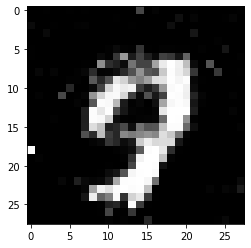

In [7]:
z=torch.randn(batch_size,latent_size).to(device)
fake_images=G(z)
#print(fake_images.shape)
fake_images=fake_images.view(batch_size,28,28).data.cpu().numpy()
plt.imshow(fake_images[0],cmap=plt.cm.gray)
#camp=plt.cm.gray

# 存储模型

In [8]:
torch.save(G.state_dict(),"mnist_genator.pth")
torch.save(D.state_dict(),"mnist_discriminator.pth")

# 加载保存的生成器模型

Sequential(
  (0): Linear(in_features=64, out_features=256, bias=True)
  (1): LeakyReLU(negative_slope=0.2)
  (2): Linear(in_features=256, out_features=784, bias=True)
  (3): Tanh()
)


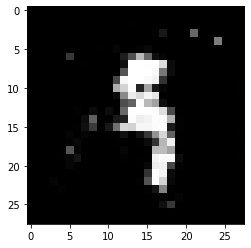

In [9]:
model = G
model.load_state_dict(torch.load("mnist_genator.pth"))
print(model)
z=torch.randn(batch_size,latent_size).to(device)
fake_images=model(z)
fake_images2=fake_images.view(batch_size,28,28).data.cpu().numpy()
plt.imshow(fake_images2[0],cmap=plt.cm.gray)

# 加载保存的判别器模型

In [10]:
model_D = D
model_D.load_state_dict(torch.load("mnist_discriminator.pth"))
print(model_D)
# print(fake_images)
# z=torch.randn(batch_size,latent_size).to(device)
print(fake_images[0].shape)
images = fake_images.reshape(batch_size, image_size).to(device)
outputs = model_D(images)
g_score = outputs
print(g_score.sum())

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): LeakyReLU(negative_slope=0.2)
  (2): Linear(in_features=256, out_features=1, bias=True)
  (3): LeakyReLU(negative_slope=0.2)
  (4): Sigmoid()
)
torch.Size([784])
tensor(9.7276, device='cuda:0', grad_fn=<SumBackward0>)


# 扩展：AutoEncoder MNIST数据集生成效果

AutoEncoder通过设计encode和decode过程使输入和输出越来越接近，是一种无监督学习过程。

https://blog.csdn.net/roguesir/article/details/77469665

In [13]:
import os

import torch
from torch.autograd import Variable
from torch import nn
from torch.utils.data import DataLoader

from torchvision.datasets import MNIST
from torchvision import transforms as tfs
from torchvision.utils import save_image



im_tfs = tfs.Compose([
    tfs.ToTensor(),
    tfs.Normalize([0.5], [0.5]) # 标准化
])

train_set = MNIST('./mnist_data', transform=im_tfs,download=True)
train_data = DataLoader(train_set, batch_size=2048, shuffle=True)

# 定义网络
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        # encoder
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, 12),
            nn.ReLU(True),
            nn.Linear(12, 3) # 输出的 code 是 3 维，便于可视化
        )
        # decoder
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(True),
            nn.Linear(12, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, 28*28),
            nn.Tanh()
        )

    def forward(self, x):
        encode = self.encoder(x)
        decode = self.decoder(encode)
        return encode, decode


class conv_autoencoder(nn.Module):
    def __init__(self):
        super(conv_autoencoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=3, padding=1),  # (b, 16, 10, 10)
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=2),  # (b, 16, 5, 5)
            nn.Conv2d(16, 8, 3, stride=2, padding=1),  # (b, 8, 3, 3)
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=1)  # (b, 8, 2, 2)
        )
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(8, 16, 3, stride=2),  # (b, 16, 5, 5)
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 8, 5, stride=3, padding=1),  # (b, 8, 15, 15)
            nn.ReLU(True),
            nn.ConvTranspose2d(8, 1, 2, stride=2, padding=1),  # (b, 1, 28, 28)
            nn.Tanh()
        )

    def forward(self, x):
        encode = self.encoder(x)
        decode = self.decoder(encode)
        return encode, decode

# autoencoder
net = autoencoder()
x = Variable(torch.randn(1, 28*28)) # batch size 是 1
code, _ = net(x)
print(code.shape)

criterion = nn.MSELoss(size_average=False)
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)

# conv_autoencoder
conv_net = conv_autoencoder()
if torch.cuda.is_available():
    conv_net = conv_net.to(device)
optimizer = torch.optim.Adam(conv_net.parameters(), lr=1e-3, weight_decay=1e-5)

def to_img(x):
    '''
    定义一个函数将最后的结果转换回图片
    '''
    x = 0.5 * (x + 1.)
    x = x.clamp(0, 1)
    x = x.view(x.shape[0], 1, 28, 28)
    return x

# 开始训练自动编码器
for e in range(100):
    for im, _ in train_data:
        # im = im.view(im.shape[0], -1)
        im = Variable(im).to(device)
        # 前向传播
        _, output = conv_net(im)
        loss = criterion(output, im) / im.shape[0] # 平均
        # 反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # if (e+1)%20==0:
    print('epoch: {}, Loss: {:.4f}'.format(e + 1, loss.item()))
    pic = to_img(output.cpu().data)
    if not os.path.exists('./simple_autoencoder'):
        os.mkdir('./simple_autoencoder')
    save_image(pic, './simple_autoencoder/image_conv_epoch{}.png'.format(e + 1))

torch.Size([1, 3])
epoch: 1, Loss: 373.6883
epoch: 2, Loss: 323.0797
epoch: 3, Loss: 289.3018
epoch: 4, Loss: 275.0599
epoch: 5, Loss: 254.7936
epoch: 6, Loss: 213.2516
epoch: 7, Loss: 203.1416
epoch: 8, Loss: 203.8627
epoch: 9, Loss: 200.3034
epoch: 10, Loss: 190.4212
epoch: 11, Loss: 191.5134
epoch: 12, Loss: 185.1606
epoch: 13, Loss: 181.8550
epoch: 14, Loss: 175.7604
epoch: 15, Loss: 172.6214
epoch: 16, Loss: 162.2693
epoch: 17, Loss: 160.3041
epoch: 18, Loss: 157.7487
epoch: 19, Loss: 150.8010
epoch: 20, Loss: 148.2188
epoch: 21, Loss: 143.4731
epoch: 22, Loss: 137.7948
epoch: 23, Loss: 135.4882
epoch: 24, Loss: 132.4848
epoch: 25, Loss: 125.1537
epoch: 26, Loss: 128.1185
epoch: 27, Loss: 127.7759
epoch: 28, Loss: 123.9745
epoch: 29, Loss: 121.9467
epoch: 30, Loss: 122.0019
epoch: 31, Loss: 116.5510
epoch: 32, Loss: 118.3284
epoch: 33, Loss: 121.0883
epoch: 34, Loss: 112.5018
epoch: 35, Loss: 114.9447
epoch: 36, Loss: 114.1455
epoch: 37, Loss: 116.1165
epoch: 38, Loss: 115.0061
ep

## 效果
迭代一百次效果
![](./simple_autoencoder/image_conv_epoch100.png)